In [15]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

In [16]:
results_dir = Path("results") / "vulpi"
values = np.load(results_dir / "results_augm3_CNN_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_optim6_CNN_mw_1.7.npy", allow_pickle=True).item()
terrains = np.array([t for t in values["terrains"] if t != "MIXED"])
inv_terrains = {t: i for i, t in enumerate(terrains)}
values

{'pred': array([0, 0, 0, ..., 3, 3, 3]),
 'true': array([0, 0, 0, ..., 3, 3, 3]),
 'conf': array([[7.35555172e-01, 2.50807226e-01, 1.21117845e-08, 1.36376368e-02],
        [9.99672890e-01, 3.34295764e-05, 1.24898900e-08, 2.93738616e-04],
        [9.99511957e-01, 1.79033566e-04, 1.66053439e-07, 3.08849383e-04],
        ...,
        [1.85980171e-01, 4.72607370e-03, 2.29266193e-02, 7.86367118e-01],
        [3.30592775e-05, 7.36587215e-04, 3.57598547e-05, 9.99194562e-01],
        [1.94215216e-03, 4.21600213e-04, 4.25663282e-04, 9.97210562e-01]],
       dtype=float32),
 'ftime': array([], dtype=float64),
 'ptime': array([], dtype=float64),
 'channels': {'imu': {'wx': True,
   'wy': True,
   'wz': True,
   'ax': True,
   'ay': True,
   'az': True},
  'pro': {'velL': True, 'velR': True, 'curL': True, 'curR': True}},
 'terrains': ['CONCRETE', 'DIRT_ROAD', 'PLOUGHED', 'UNPLOUGHED']}

In [17]:
clf_values = values
# clf_values = values[1700]

def convert_to_int(x):
    if x.dtype == str:
        return np.array([inv_terrains[t] for t in x])
    return x

ypred = convert_to_int(clf_values["pred"])
ytest = convert_to_int(clf_values["true"])
terr_pred = terrains[ypred]
terr_test = terrains[ytest]

Text(0.5, 1.0, 'vulpi')

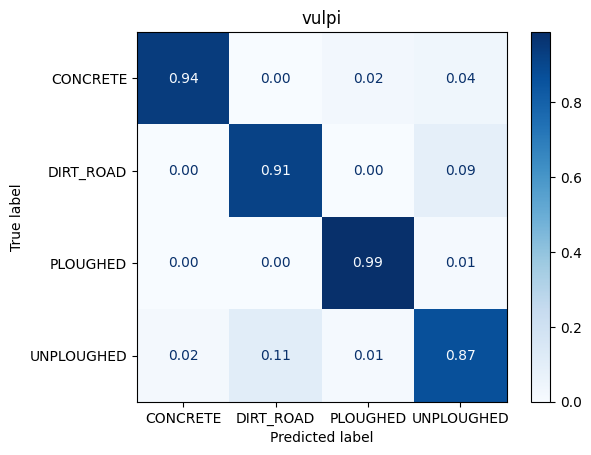

In [18]:
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    normalize="true",
    values_format=".2f",
    cmap="Blues",
)
disp.ax_.set_title(results_dir.stem)

Text(0.5, 1.0, 'vulpi')

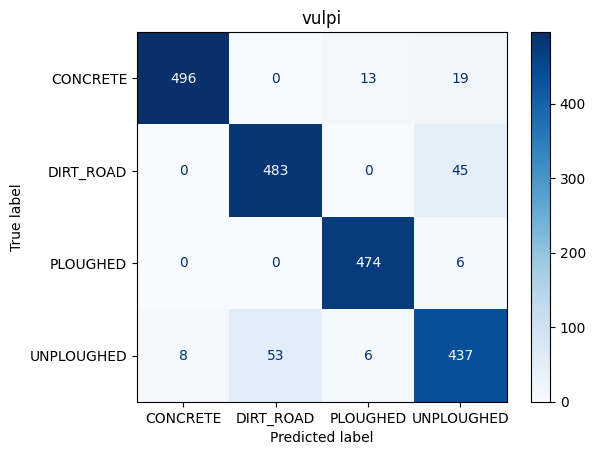

In [19]:
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    cmap="Blues",
)
disp.ax_.set_title(results_dir.stem)

In [20]:
metrics = pd.Series(
    {
        "accuracy": accuracy_score(
            ytest,
            ypred,
        ),
        "precision": precision_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "recall": recall_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "f1-score": f1_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
    }
)

/Users/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predic

In [21]:
metrics

accuracy                 0.926471
precision    [0.0, 0.0, 0.0, 0.0]
recall       [0.0, 0.0, 0.0, 0.0]
f1-score     [0.0, 0.0, 0.0, 0.0]
dtype: object